### \#4

Find u: $[O,L] \times [0, \infty) \rightarrow \mathbb{R}$, wehre L, D, C > 0, that satisfies: $\\
\begin{cases} u_t = Du_{xx} + Cu \\ u(x,0) = \text{sin}^2(\frac{\pi}{L}x) \text{ for all } 0 \leq x \leq L \\ u(0,t) = 0 \text{ for all } t \geq 0 \\ u(L,t) = 0 \text{ for all } t \geq 0 \end{cases}$


For the sake of part b, we'll be assuming that C = D = 1 and using the Crank Nicolson method to find the minimum patch size (L) that allows the population to survive. In Sauer, we learn that the model population survives when $C > \pi^2 D/L^2$. Using the settings given for this problem, this means that our population model should survive when $L > \pi$. To compare with the result from the textbook, we'll test different values of L both less and greater than the expected threshhold. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from internallib import tridiag
plt.rcParams['font.size'] = 16

def CN(w, par):
    """
    Return the next time iterate of the reaction-diffusion equation using Crank-Nicolson method. The boundary condition is assumed to be homogeneous Dirichlet.
    
    Input:
        w: (1D array) Current time iterate.
        par: (dict) Parameter for the method.
    Output:
        w_new: (1D array) Next time iterate.
    """
    # lump constants
    s = par['D']*par['k']/(par['h']*par['h'])
    kC = par['k']*par['C']
    
    # solution array
    n = len(w[1:-1])
    w_new = np.zeros(n)

    # create matrices A
    diag_A = 2.+2.*s - kC
    off_diag_A = -s
    A = tridiag(off_diag_A, diag_A, off_diag_A, n)

    # create matrices B
    diag_B = 2.-2.*s + kC
    off_diag_B = s
    B = tridiag(off_diag_B, diag_B, off_diag_B, n)

    # Main line of the Crank-Nicolson method
    w_new = np.linalg.solve(A, B@w[1:-1])
    """
    This line is equivalent to the following for loop, but much faster.
    N = len(w)
    for i in range(1, N+1):
        w_new[i] = w[i] + s*(w[i-1] - 2*w[i] + w[i+1])
    """

    return w_new

In [2]:
def solve_react_diff(ic, bc1, bc2, D, C, L, T, N, K, t0=0.):
    """
    Return numerical solution of reaction-diffusion equation using Crank-Nicolson method. Current version assumes homogeneous Dirichlet boundary condition.
    
    Input:
        ic: (1D array) Initial temperature distribution.
        bc1: (float or 1D array) Boundary condition at x=a.
        bc2: (float or 1D array) Boundary condition at x=b.
        D: (float) Diffusion coefficient.
        L: (float) Length of spatial domain.
        T: (float) Final time.
        C: (float) Coefficient for u in the PDEs
        N: (int) Number of spatial grid points.
        K: (int) Number of time grid points.
        t0: (float) Initial time. (default=0.)
    Output:
        w: (2D array) Numerical solution.
    """
    w = np.zeros((N+2, K+1))
    h = L/(N+1)
    k = (T-t0)/K
    par = {'D': D, 'C': C, 'h': h, 'k': k}
    
    # Initial/boundary condition
    w[:, 0] = ic
    w[0, :] = bc1
    w[-1, :] = bc2

    # time marching
    for j in range(K):
        w[1:-1, j+1] = CN(w[:,j], par=par)

    return w

In [19]:
# Values for the problem
N = 39
K = 40
L = 3.2
# C > pi^2 D/L^2 --> population growth
# Try C = 9.5 for extinction
# Try C = 10 for growth
C = 1.
D = 1.

T = 2. 
x = np.linspace(0., L, N+2)
t = np.linspace(0., T, K+1)

In [20]:
#%% Initial condition
# set initial condition

f = lambda x: np.sin(np.pi*x/L)*np.sin(np.pi*x/L)

ic = f(x)
bc1 = 0.
bc2 = 0.

w = solve_react_diff(ic, bc1, bc2, D, C, L, T, N, K)

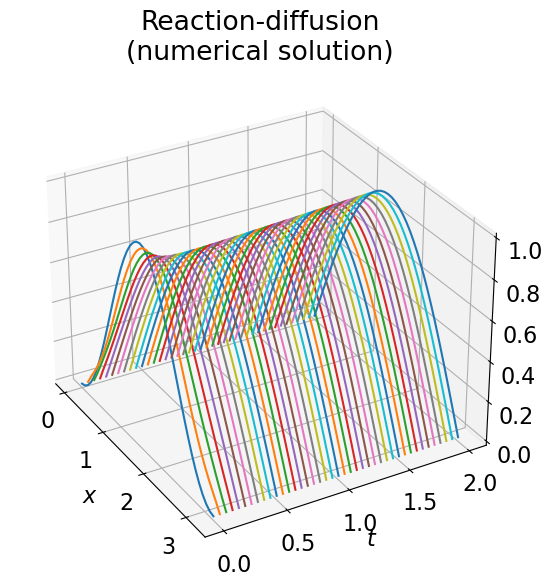

In [21]:
#%% plot
fig, ax = plt.subplots(1,1, figsize=(6.5, 6.5), subplot_kw={'projection':'3d'})

# "time slice" plot
# for j in range(K+1):
#     ax.plot(j*T/K * np.ones_like(x), x, w[:, j])
for j in range(K+1):
    ax.plot(x, t[j]*np.ones(N+2), w[:, j])


# surface plot (toggle)
# Note: need to reshape 1st coordinate to a column vector
# ax.plot_surface(x.reshape(-1,1), t, w, cmap='viridis', alpha=0.8)

# Change the angle of projection

ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.view_init(elev=30, azim=-30)

ax.set_title('Reaction-diffusion\n(numerical solution)')

plt.show()

Setting C and D equal to one and plugging in values less than $\pi$ shows that the population moves towards extinction over time. Note for some of the values closer to the threshhold value that the population doesn't go extinct in the alloted time in the graph, but does u steadily decreasing as time passes. As we plug in values of L larger than $\pi$ that graph for u shows the model population growing as time passes. The results from graphing different values of L show that some other visual of u would probably be better to visualize the behavior of u with values of L close to the threshold. 